In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [52]:
filename = "Sample 5.csv"
filepath = f"data/axial force/Post welding/{filename}"

In [53]:
import csv


# Function to process the raw data into a structured list of 2-item lists
def process_csv_lines(file):
    processed_data = []
    # Use the csv reader to handle quotes and commas properly
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        # A valid row should have at least 2 elements (key and value)
        if len(row) >= 2:
            # Join any extra elements back into the second column (the 'Value')
            key = row[0]
            value = ", ".join(row[1:])
            processed_data.append(
                [key, value.strip()]
            )  # Strip any leading/trailing space from value
    return processed_data


with open(filepath, "r", encoding="utf-8") as file:
    data = process_csv_lines(file)

df = pd.DataFrame(data)
df.rename(columns={0: "Parameter", 1: "Value"}, inplace=True)
df["Parameter"] = df["Parameter"].str.strip().str.replace(":", "")
df.set_index("Parameter", inplace=True)
df.index.name = None
df.columns = ["Value"]
meta = df["Value"].iloc[:18]
meta

DynoWare                                     Version 3.2.2.0
Path                   D:\Parn (paper ML Weld)\Post welding\
Filename                                        Sample 5.dwd
Config ID                                       Sample 5.cfg
Setup ID                                                   0
Manipulated                                                0
Filename 1                                                  
Filename 2                                                  
Date                           Wednesday,  January 01,  2025
Time                                                17:46:34
Sampling rate [Hz]                                       100
Measuring time [s]                                       180
Delay time [s]                                             0
Cycle time [s]                                             0
Cycles                                                     1
Samples per channel                                    18001
Cycle interval          

In [54]:
af = pd.read_csv(filepath, skiprows=18)
af = af.iloc[1:, :]
# Convert columns to numeric, coerce errors to NaN
af["Time"] = pd.to_numeric(af["Time"], errors="coerce")
af["Fx"] = pd.to_numeric(af["Fx"], errors="coerce")
af["Fy"] = pd.to_numeric(af["Fy"], errors="coerce")
af["Fz"] = pd.to_numeric(af["Fz"], errors="coerce")
af["Mz"] = pd.to_numeric(af["Mz"], errors="coerce")
af.set_index("Time", inplace=True)
af

,Mz,Fz,Fy,Fx
Time,,,,
0.00,-1.061140,-0.208304,-0.007586,-0.003161
0.01,-0.802176,-0.192086,-0.000916,0.001755
0.02,-1.061140,-0.208871,-0.007553,-0.003095
0.03,-0.802176,-0.192784,-0.000883,0.001755
0.04,-1.062880,-0.209089,-0.007564,-0.003106
...,...,...,...,...
179.96,2.071270,0.269557,0.013962,-0.026932
179.97,1.750400,0.252773,0.008447,-0.034005
179.98,2.047290,0.270429,0.016033,-0.028981


<Axes: title={'center': 'Axial Force over Time - Post Welding Sample 1'}, xlabel='Time (s)', ylabel='Axial Force (kN)'>

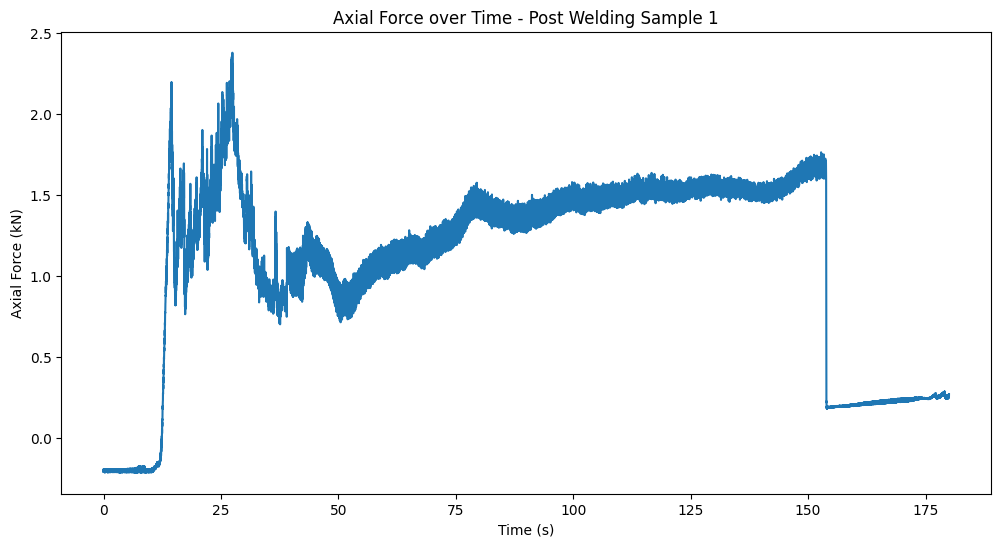

In [55]:
af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)

<Axes: xlabel='Time'>

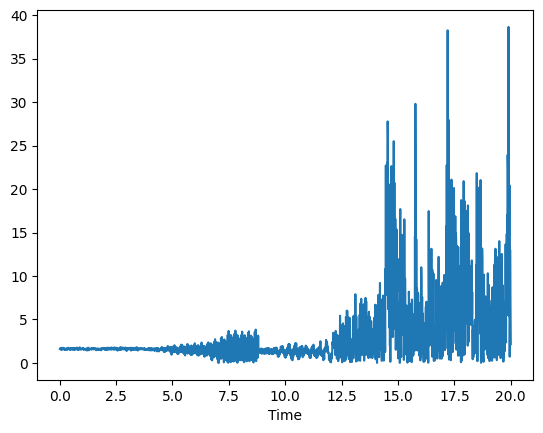

In [56]:
# Track the first data steep slope during the first few seconds
idxes = af.index[af.index <= 20]
# Plot the slope with time diff
slope = af["Fz"].loc[idxes].diff().abs() / af.index.to_series().diff()
slope.plot()


First steep slope at time 12.43 s with Fz = 0.0460815 kN


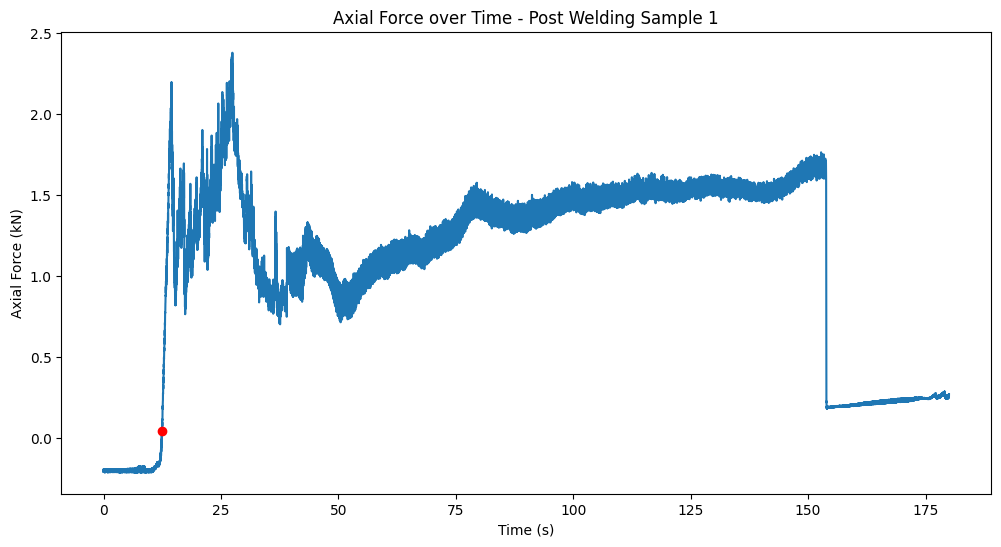

In [57]:
# Identify the first point where slope exceed a threshold

threshold = 5  # Define a threshold for steep slope
locs_steep = slope[slope > threshold]
locs_steep_idx = locs_steep.index[0]
locs_steep_value = af.loc[locs_steep_idx, "Fz"]
print(f"First steep slope at time {locs_steep_idx} s with Fz = {locs_steep_value} kN")

# Mark the max slope point on the original plot
ax = af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)
ax.plot(
    locs_steep_idx,
    locs_steep_value,
    "ro",  # red dot
)